#  **POTHOLE DETECTION USING DEEP LEARNING**


#This notebook builds and trains a custom pothole detection model using YOLOv5 (You Only Look Once v5) and Deep Learning Algorithms and then uses the trained model to:

* # Detect potholes in new images
* # Display bounding boxes
* # Show the size of each detected pothole



**1. CLONING YOLO V5**


* Cloning and Installing of YOLOv5 has been done here and installing the several deep learning algorithms such as (Pytorch,Matplotlib,CNN,OpenCV) for further usage

In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt



Cloning into 'yolov5'...
remote: Enumerating objects: 17430, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 17430 (delta 73), reused 28 (delta 26), pack-reused 17327 (from 4)
Receiving objects: 100% (17430/17430), 16.30 MiB | 16.81 MiB/s, done.
Resolving deltas: 100% (11938/11938), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/

**2. DOWNLOADING AND EXTRACTION OF MWPD DATASETS**

* In this step the downloading process and extraction of the multi-weather pothole images has been done and then the user will upload the downloaded zip file from their local space and then extract it here.

* Link :- "https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/s5hx9n2jc3-2.zip"

In [7]:
# 📁 STEP 2: Upload your dataset ZIP here
from google.colab import files
uploaded = files.upload()

# 📂 STEP 3: Extract ZIP and preview structure
import zipfile
import os

zip_name = next(iter(uploaded))
extract_dir = "/content/dataset"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check extracted structure
!ls -R $extract_dir


Streaming output truncated to the last 5000 lines.
502_jpg.rf.a96403ba719f18e4f416a4fbe7545bf2.jpg
502_jpg.rf.c0d8775fe931e1b8ef7453b49959e2d5.jpg
502_jpg.rf.e34324146004ed02f7cb37a77e0d936e.jpg
503_jpg.rf.72ec75f68b060a585905dd032eedb90c.jpg
503_jpg.rf.9e8d0b02ccffbd01398a5a61ff7ef27c.jpg
503_jpg.rf.b7c4cdb59f4691448f1e6d7db197c5a8.jpg
504_jpg.rf.3666955e3c2a118fbb258819c05b3e0e.jpg
504_jpg.rf.50e63f9689ba4b1bd672d5edad0089c6.jpg
504_jpg.rf.6938e94040de6ac305455a9d8d6621b1.jpg
504_jpg.rf.6ed57246d6804628fd4920bd83500684.jpg
504_jpg.rf.9e910b83af2340ed0f8f9d1f5ac7635a.jpg
504_jpg.rf.ad66eb2819f2236600d558825741977c.jpg
505_jpg.rf.1d26af7a8709608fcfa2707801e57dbe.jpg
505_jpg.rf.4b8cdf3bf83a5005098f1e838e33792d.jpg
505_jpg.rf.e41857d2d83ef38ea9250421475c599c.jpg
506_jpg.rf.70096174e899881e5b2142a6880942eb.jpg
506_jpg.rf.943fa6a42a397c83a0a4f4a80d54f35a.jpg
506_jpg.rf.e20b474dbc53f4befd5ee3a4448d398a.jpg
507_jpg.rf.4be824523e3830e04d7ed9459affc3bd.jpg
507_jpg.rf.b5d1dcec06c2d5165d6b234a9b

**3. CHECKING THE LOCATION OF DATASETS IN THE GOOGLE COLAB DIRECTORY**

* This step ensures that YOLOv5 can easily find and use your custom dataset configuration without needing to reference a long file path each time.

In [16]:
import shutil
shutil.copy("/content/dataset/MWPD1/MWPD2/data.yaml", "/content/yolov5/data.yaml")


'/content/yolov5/data.yaml'

**4. UPDATING THE DATA.YAML FILE ACCORDING TO FILE LOCATION**

In [17]:
data_yaml = """
train: /content/dataset/MWPD1/MWPD2/train/images
val: /content/dataset/MWPD1/MWPD2/valid/images
test: /content/dataset/MWPD1/MWPD2/test/images

nc: 1
names: ['pothole']
"""

with open('/content/yolov5/data.yaml', 'w') as f:
    f.write(data_yaml)


**5. CHECKING THE AVAILABILITY OF IMAGES IN THE DIRECTORY**

In [18]:
import glob

print("Train images:", len(glob.glob('/content/dataset/MWPD1/MWPD2/train/images/*.jpg')))
print("Train labels:", len(glob.glob('/content/dataset/MWPD1/MWPD2/train/labels/*.txt')))


Train images: 2730
Train labels: 2730


**6. TRAINING OF MODEL**

* This step trains a custom YOLOv5 object detection model to detect potholes using your dataset, and saves the trained weights and results for evaluation where images are categorized by the formats which includes 640*640 pixels, batch of 16 means 16 images are processed at once, epochs are 50 to runs training for 50 complete passes through the training dataset.



In [19]:
%cd /content/yolov5

!python train.py --img 640 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt --name pothole_model


Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      36/49       4.5G    0.03052    0.02064          0         70        640:  25% 42/171 [00:15<00:43,  2.99it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      36/49       4.5G    0.03049    0.02073          0         78        640:  25% 43/171 [00:15<00:45,  2.80it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      36/49       4.5G    0.03053    0.02078          0         61        640:  26% 44/171 [00:16<00:42,  2.99it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

**7. CHECKING THE WEIGHTS IN THE MODEL**

In [20]:
!ls /content/yolov5/runs/train/pothole_model2/weights



best.pt  last.pt


**8. TESTING**

* In this step model has tested some images which is available in test folder with confidence threshold of 0.25 and pixels configuration is 640*640.

In [21]:
!python detect.py --weights runs/train/pothole_model2/weights/best.pt \
                  --img 640 \
                  --conf 0.25 \
                  --source /content/dataset/MWPD1/MWPD2/test/images \
                  --name pothole_results


detect: weights=['runs/train/pothole_model2/weights/best.pt'], source=/content/dataset/MWPD1/MWPD2/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=pothole_results, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/97 /content/dataset/MWPD1/MWPD2/test/images/12_jpg.rf.98223fbf0c9935d763f81b9e25e9712b.jpg: 640x640 1 pothole, 11.4ms
image 2/97 /content/dataset/MWPD1/MWPD2/test/images/139_jpg.rf.f2928d6451a5fd5ef95a3051b4b2ba5a.jpg: 640x640 7 potholes, 11.5ms
image 3/97 /cont

**9. VIEW OF RESULTS**

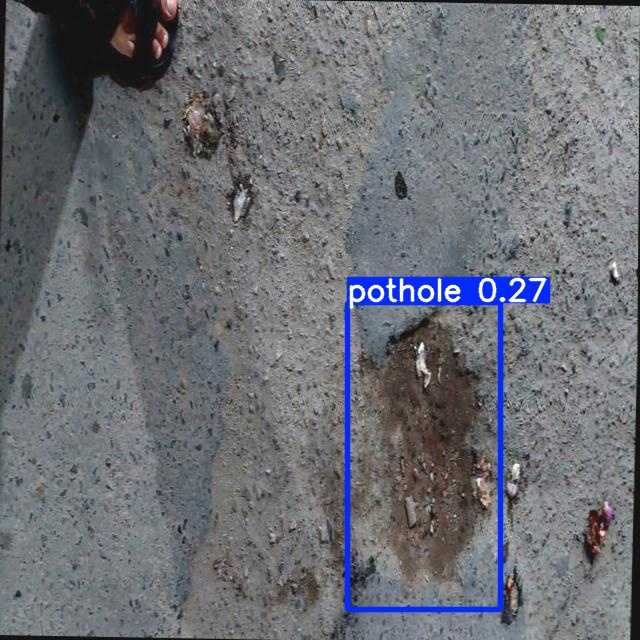

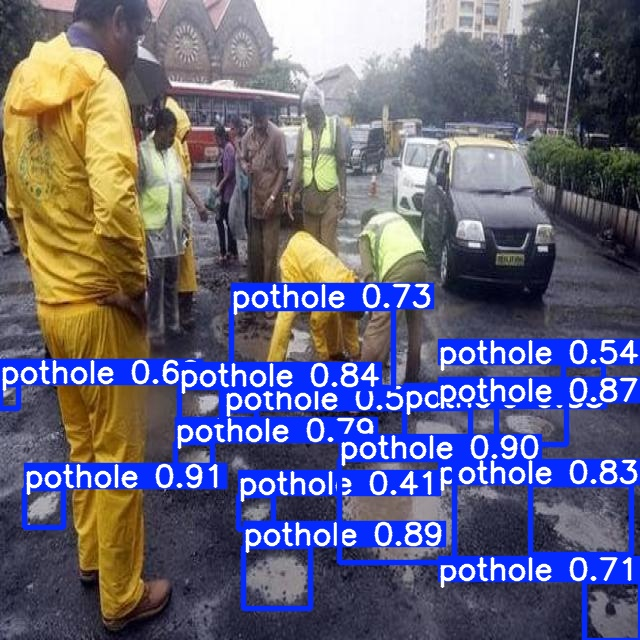

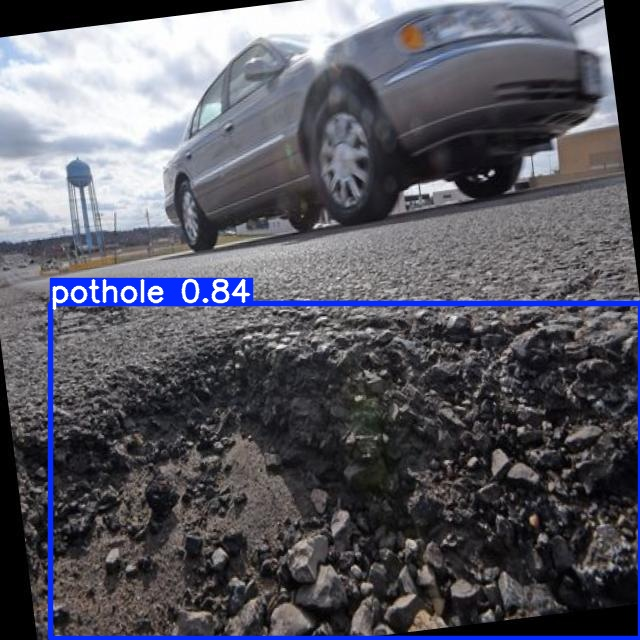

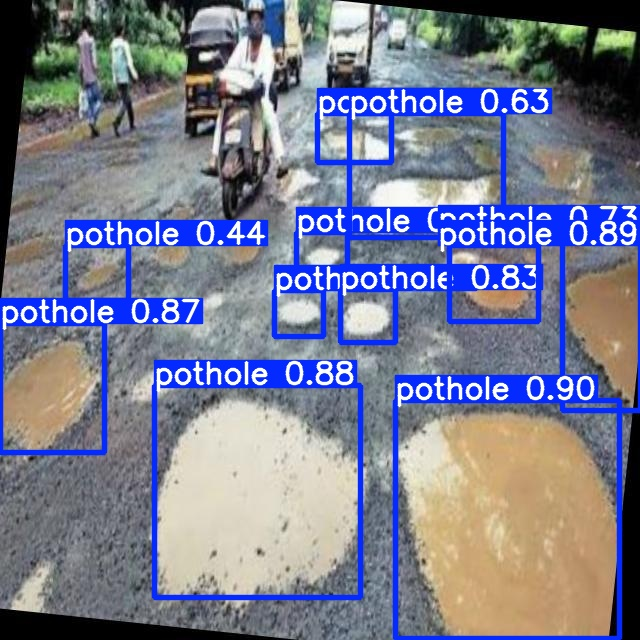

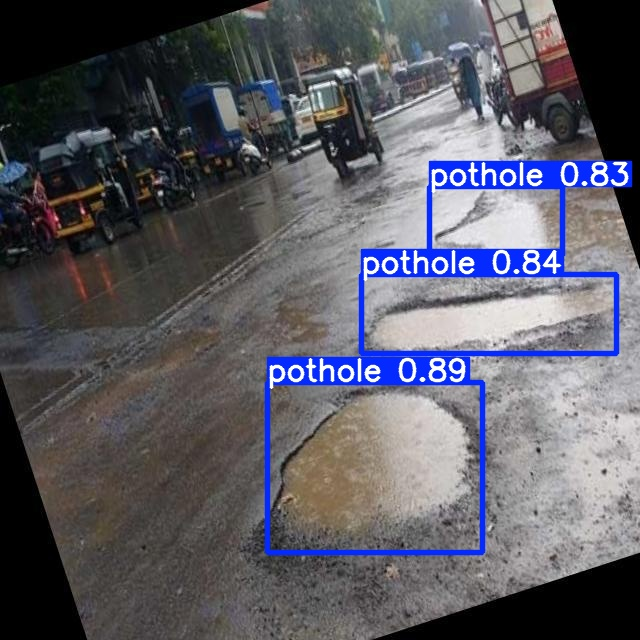

In [22]:
from IPython.display import Image, display
import glob

result_images = glob.glob('/content/yolov5/runs/detect/pothole_results/*.jpg')

for img_path in result_images[:5]:  # show first 5
    display(Image(filename=img_path))


In [24]:
!python val.py --weights runs/train/pothole_model2/weights/best.pt --data data.yaml --task test


val: data=data.yaml, weights=['runs/train/pothole_model2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/dataset/MWPD1/MWPD2/test/labels... 97 images, 0 backgrounds, 0 corrupt: 100% 97/97 [00:00<00:00, 1534.82it/s]
test: New cache created: /content/dataset/MWPD1/MWPD2/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:04<00:00,  1.06s/it]
                   all         97        292      0.724      0.647      0.659      0.341
Speed: 0.3ms pre-process, 11.3ms infere

**10. VERIFICATION**

* Now the below given steps will help an user to upload a new image which contains pothole and then model will detect and produce the results for them.

* Please don't upload .jfif,.avif and more advance formats of images to detect the potholes.

* For smoothness, please upload .jpg file type of image for detection.

In [36]:
from google.colab import files
uploaded = files.upload()
uploaded_filenames = list(uploaded.keys())
print("Uploaded files:", uploaded_filenames)


Saving pot.jpg to pot.jpg
Uploaded files: ['pot.jpg']


In [37]:
!python detect.py --weights runs/train/pothole_model2/weights/best.pt \
                  --img 640 \
                  --conf 0.15 \
                  --source . \
                  --name auto_detect_run \
                  --save-txt


detect: weights=['runs/train/pothole_model2/weights/best.pt'], source=., data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.15, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=auto_detect_run, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/3 /content/yolov5/pot.jpg: 352x640 (no detections), 43.5ms
image 2/3 /content/yolov5/pothole (1).jpg: 608x640 3 potholes, 57.1ms
image 3/3 /content/yolov5/pothole.jpg: 608x640 3 potholes, 12.9ms
Speed: 0.6ms pre-process, 37.8ms inference, 66.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to

No detection found for: pot.jpg


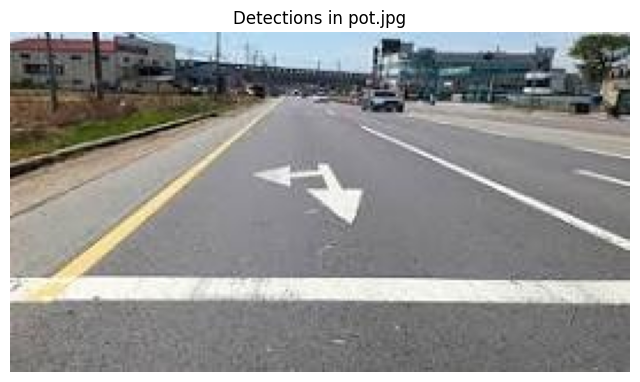

In [38]:
import cv2
import os
from matplotlib import pyplot as plt

output_img_dir = "/content/yolov5/runs/detect/auto_detect_run4"
output_label_dir = f"{output_img_dir}/labels"

for file in uploaded_filenames:
    img_path = os.path.join(output_img_dir, file)
    label_path = os.path.join(output_label_dir, file.rsplit('.', 1)[0] + '.txt')

    # Read original image
    img = cv2.imread(img_path)

    if img is None:
      print(f"❌ Could not read image: {img_path}")
      continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_h, img_w = img.shape[:2]

    # Draw detections
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for i, line in enumerate(f.readlines(), 1):
                cls, xc, yc, w, h = map(float, line.strip().split())

                # Convert YOLO to pixel coords
                x_center, y_center = int(xc * img_w), int(yc * img_h)
                width, height = int(w * img_w), int(h * img_h)
                x1 = int(x_center - width / 2)
                y1 = int(y_center - height / 2)
                x2 = int(x_center + width / 2)
                y2 = int(y_center + height / 2)

                # Draw box and size
                cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
                label = f"Pothole {i}: {width}x{height}px"
                cv2.putText(img_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    else:
        print(f"No detection found for: {file}")

    # Display the image
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f'Detections in {file}')
    plt.show()
